In [11]:
# Collect videos from a directory
import os

video_directory = 'C:/Users/nihal/Desktop/Academics/Main/MainProject/Main_Project/Project/videos'
videos = []
for filename in os.listdir(video_directory):
    if filename.endswith('1.mp4'):
        videos.append(os.path.join(video_directory, filename))

In [12]:
# Resize videos to a standard size
import cv2

width, height = 640, 360

for video in videos:
    cap = cv2.VideoCapture(video)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (width, height))
        frames.append(frame)
    cap.release()

    # Save resized frames to disk
    video_name = os.path.splitext(os.path.basename(video))[0]
    for i, frame in enumerate(frames):
        filename = f'{video_name}_frame{i:03}.jpg'
        cv2.imwrite(os.path.join('C:/Users/nihal/Desktop/Academics/Main/MainProject/Main_Project/Project/frame', filename), frame)

In [16]:
import os
import cv2
import numpy as np
from glob import glob

# Define the function to extract frames from a video
def extract_frames(video):
    cap = cv2.VideoCapture(video)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames_per_segment = frame_count // num_frames
    frames = []

    for i in range(num_frames):
        frame_number = i * frames_per_segment
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
        ret, frame = cap.read()
        frame = cv2.resize(frame, (width, height))
        frames.append(frame)

    cap.release()
    frames = np.array(frames)
    return frames

# Define the function to extract features from videos
def extract_features(videos):
    features = []

    for video in videos:
        frames = extract_frames(video)
        features.append(frames)

    features = np.array(features)
    return features

# Set the parameters for feature extraction
num_frames = 16
width = 224
height = 224

# Define the path to your data directory
data_dir = 'C:/Users/nihal/Desktop/Academics/Main/MainProject/Main_Project/Project/videos'

# Get a list of file paths to your videos
videos = glob(os.path.join(data_dir, 'C:/Users/nihal/Desktop/Academics/Main/MainProject/Main_Project/Project/videos/1.mp4'))

# Extract features from the videos
X = extract_features(videos)

# Save the features to a file
np.save('C:/Users/nihal/Desktop/Academics/Main/MainProject/Main_Project/Project/features.npy', X)


In [17]:
videoclass="Crowd"
feature_array=[]
feature_array.append([X,videoclass])
# print(feature_array)
import numpy as np
import pandas as pd
# fea=np.mean(feature_array.T,axis=0)
# print(feature_array)
ee=pd.DataFrame(feature_array,columns=['f','c'])
print(ee)
ee.to_csv('C:/Users/nihal/Desktop/Academics/Main/MainProject/Main_Project/Project/dataset.csv', index=False)

                                                   f      c
0  [[[[[172 182 181]\n [173 183 182]\n [174 184 1...  Crowd


Features shape: (1, 16, 224, 224, 3)


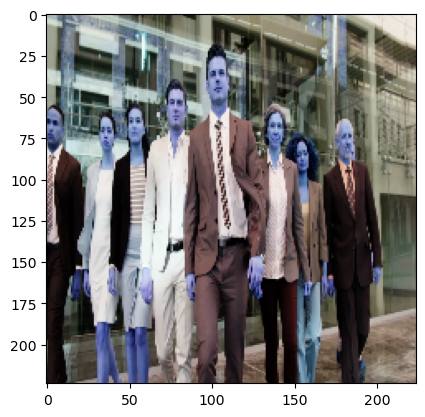

In [18]:
import numpy as np

# Load the features from the file
features = np.load('C:/Users/nihal/Desktop/Academics/Main/MainProject/Main_Project/Project/features.npy')

# Print the shape of the features array
print('Features shape:', features.shape)

# Display the first video's first frame
import matplotlib.pyplot as plt
plt.imshow(features[0][0])
plt.show()

In [49]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Multiply, GlobalAveragePooling2D, Reshape, Dense, Add
from tensorflow.keras.models import Model

# Define the input shape
input_shape = (16, None, 3)  # replace with the actual shape of your feature map

# Define the attention mechanism
def attention_block(x):
    # Channel attention
    c_avg = GlobalAveragePooling2D()(x)
    c_dense_1 = Dense(units=int(x.shape[-1]), activation='relu')(c_avg)
    c_dense_2 = Dense(units=int(x.shape[-1]), activation='sigmoid')(c_dense_1)
    c_out = Multiply()([x, c_dense_2])
    
    # Spatial attention
    s_conv = Conv2D(filters=1, kernel_size=3, padding='same', activation='sigmoid')(x)
    s_out = Multiply()([x, s_conv])
    
    # Hybrid attention
    out = Add()([c_out, s_out])
    
    return out

# Define the model architecture
inputs = Input(shape=input_shape)
x = Conv2D(filters=512, kernel_size=3, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = attention_block(x)
x = Conv2D(filters=1, kernel_size=1)(x)
x = Activation('relu')(x)
x = Reshape((-1,))(x)
model = Model(inputs=inputs, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Specify the path where you want to save the model
path = 'C:/Users/nihal/Desktop/Academics/Main/MainProject/Main_Project/Project/model1.h5'

# Save the model to the specified path in HDF5 format
model.save(path, save_format='h5')

In [53]:

import cv2
import numpy as np
import tensorflow as tf

# Define the paths to the trained model and the video file
model_path = 'C:/Users/nihal/Desktop/Academics/Main/MainProject/Main_Project/Project/model1.h5'
video_path = 'C:/Users/nihal/Desktop/Academics/Main/MainProject/Main_Project/Project/videos/1.mp4'

# Load the trained model
model = tf.keras.models.load_model(model_path)

# Define the input shape of the model
input_shape = (16, 224, 224, 3)  # replace with the actual shape of your feature map

# Open the video file
cap = cv2.VideoCapture(video_path)

# Initialize the headcount
headcount = 0

    # Read the next frame
ret, frame = cap.read()
    
    
    # #Resize the frame to the input shape of the model
resized = cv2.resize(frame, (input_shape[1], input_shape[0]), interpolation=cv2.INTER_LINEAR)
    
    # Normalize the pixel values
normalized = resized.astype('float32') / 255.0
    
    # Add a batch dimension to the input tensor
tensor = np.expand_dims(normalized, axis=0)
    
    # Make a prediction using the model
prediction = model.predict(tensor)[0]
    
    # Add the predicted headcount to the total headcount
headcount += prediction
    
# Release the video file and print the total headcount
cap.release()
print('Total headcount:', int(sum(headcount)))

1/1 [==============================] - 0s 75ms/step
Total headcount: 9
